### c) Write  a colab pytorch classes based - 3 layer deep neural network for non linear regression using pytorch builtin functionality of modules etc.,. backprop etc.,.

# **Setup**

Import the necessary libraries.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# **Defining Neural Network Architecture**
Here we define the neural network architecture using 3 hidden layers.

In [2]:
# Define the neural network architecture
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Net, self).__init__()
        self.hidden1 = nn.Linear(input_size, hidden_size)
        self.hidden2 = nn.Linear(hidden_size, hidden_size)
        self.output = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.relu(self.hidden1(x))
        x = torch.relu(self.hidden2(x))
        x = self.output(x)
        return x

In [3]:
# Generate random 3D data for non-linear regression
np.random.seed(0)
X = np.random.rand(100, 3)
y = np.sin(2 * np.pi * X[:, 0]) + np.cos(2 * np.pi * X[:, 1]) + np.tan(2 * np.pi * X[:, 2]) + np.random.normal(0, 0.1, size=(100,))

# Convert data to PyTorch tensors
X_tensor = torch.from_numpy(X).float()
y_tensor = torch.from_numpy(y).float().unsqueeze(1)

# **Define Hyperparameters**
We define a set of hyperparameters such as input_size, hidden_size, output_size, number of epochs, and learning_rate.

In [4]:
# Hyperparameters
input_size = 3
hidden_size = 20
output_size = 1
num_epochs = 1000
learning_rate = 0.01

# **Initialize Model**
Here we initialize the model with the specified input_size, hidden_size, and output_size.

In [5]:
# Initialize the model
model = Net(input_size, hidden_size, output_size)

In [6]:
# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# **Training loop**
This is where we perform the training loop and print out the Epoch and Loss.

In [7]:
# Training loop
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [1/1000], Loss: 216.1122
Epoch [2/1000], Loss: 215.8920
Epoch [3/1000], Loss: 215.6803
Epoch [4/1000], Loss: 215.4639
Epoch [5/1000], Loss: 215.2431
Epoch [6/1000], Loss: 215.0204
Epoch [7/1000], Loss: 214.8074
Epoch [8/1000], Loss: 214.5877
Epoch [9/1000], Loss: 214.3651
Epoch [10/1000], Loss: 214.1435
Epoch [11/1000], Loss: 213.9346
Epoch [12/1000], Loss: 213.7352
Epoch [13/1000], Loss: 213.5363
Epoch [14/1000], Loss: 213.3683
Epoch [15/1000], Loss: 213.2116
Epoch [16/1000], Loss: 213.0501
Epoch [17/1000], Loss: 212.8740
Epoch [18/1000], Loss: 212.6741
Epoch [19/1000], Loss: 212.4546
Epoch [20/1000], Loss: 212.2168
Epoch [21/1000], Loss: 211.9497
Epoch [22/1000], Loss: 211.6506
Epoch [23/1000], Loss: 211.3213
Epoch [24/1000], Loss: 210.9622
Epoch [25/1000], Loss: 210.5816
Epoch [26/1000], Loss: 210.1877
Epoch [27/1000], Loss: 209.7925
Epoch [28/1000], Loss: 209.4406
Epoch [29/1000], Loss: 209.0727
Epoch [30/1000], Loss: 208.6859
Epoch [31/1000], Loss: 208.2769
Epoch [32/1000], 

# **Plot Results**

In [9]:
# Assuming `model` is your trained PyTorch model and `X_tensor` is your input features as a PyTorch tensor
# Ensure X is converted to a PyTorch Tensor if it hasn't been already
X_tensor = torch.FloatTensor(X)  # Convert X to a PyTorch tensor if needed

# Set model to evaluation mode
model.eval()

# Predict
with torch.no_grad():
    predicted_tensor = model(X_tensor)

# Convert predictions back to a numpy array if desired
predicted = predicted_tensor.numpy()  # This assumes you're working with a CPU tensor

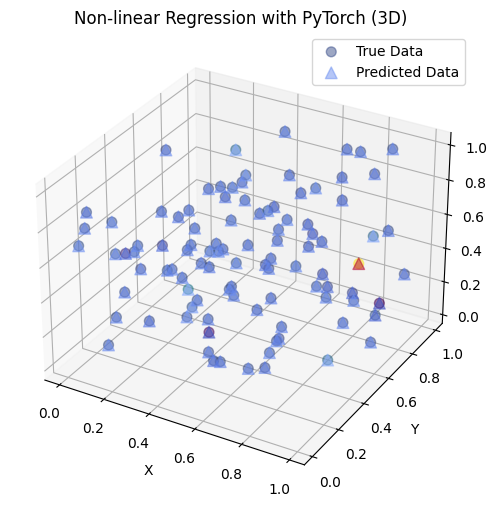

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # This import registers the 3D projection, but is otherwise unused.

# Assuming X is your features matrix and y is the true labels vector
# 'predicted' is the predicted labels from your regression model

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot true data points
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis', marker='o', s=50, alpha=0.5, label='True Data')

# Plot predicted data points
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=predicted.flatten(), cmap='coolwarm', marker='^', s=70, alpha=0.5, label='Predicted Data')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Non-linear Regression with PyTorch (3D)')
ax.legend(loc='best')

plt.show()